# Skin Disorder Prediction — Project Notebook





## Problem statement & domain summary

The task is to analyze a dermatology dataset with clinical and histopathological attributes (33 features + age) and build predictive models for differentiating erythemato-squamous diseases: **psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris**. Clinical features are rated 0–3; histopathological features are also 0–3; family history is binary; age is numeric.

The notebook below contains:
- Domain analysis & goals
- Exploratory Data Analysis (EDA)
- Preprocessing and feature engineering
- Multiple supervised classifiers and model comparison
- Suggestions for early identification of skin diseases (for clinicians)
- Challenges encountered and mitigation approaches
- Final recommendation and conclusion


## Goals of this project
1. Understand data distribution and missingness.
2. Clean and preprocess the data for machine learning.
3. Train and compare multiple models and create a model comparison report.
4. Provide actionable suggestions for clinicians to aid early diagnosis.
5. Document challenges and choices made during the project.


### 🧾 Project Tasks Overview — Skin Disorder Prediction

**Task 1 — Data Analysis Report**  
Perform complete exploratory data analysis (EDA) on the given dermatology dataset.  
Include data inspection, feature understanding, visualization of clinical and histopathological attributes, and insights about class distribution.

**Task 2 — Predictive Modeling**  
Build and evaluate machine-learning models to classify different skin diseases.  
Use suitable preprocessing, cross-validation, and performance metrics (Accuracy, Macro F1).  
Prepare a **Model Comparison Report** identifying the best model for deployment.

**Task 3 — Suggestions to Doctors**  
Provide practical insights or recommendations to help dermatologists identify diseases at early stages, based on model and feature analysis.

**Additional Requirements:**  
- Include a short note on **Challenges faced** and how they were handled.  
- All results and reports should be presented in a single Jupyter notebook.


In [1]:
# Imports & load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Path to uploaded CSV (already present in the environment)
csv_path = '/content/dataset_35_dermatology (1).csv'
df = pd.read_csv(csv_path)

print('Dataset shape:', df.shape)
df.head()


Dataset shape: (366, 35)


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


## Exploratory Data Analysis (EDA)

The following steps are performed:
- Basic info, missing values, and data types
- Distribution of target classes
- Feature distributions and correlations


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
erythema,366.0,NaN,NaN,NaN,2.068306,0.664753,0.0,2.0,2.0,2.0,3.0
scaling,366.0,NaN,NaN,NaN,1.795082,0.701527,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,NaN,NaN,NaN,1.54918,0.907525,0.0,1.0,2.0,2.0,3.0
itching,366.0,NaN,NaN,NaN,1.36612,1.138299,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,NaN,NaN,NaN,0.63388,0.908016,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,NaN,NaN,NaN,0.448087,0.957327,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,NaN,NaN,NaN,0.166667,0.570588,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,NaN,NaN,NaN,0.377049,0.834147,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,NaN,NaN,NaN,0.614754,0.982979,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,NaN,NaN,NaN,0.519126,0.905639,0.0,0.0,0.0,1.0,3.0


Missing values (top 20):
erythema                            0
scaling                             0
definite_borders                    0
itching                             0
koebner_phenomenon                  0
polygonal_papules                   0
follicular_papules                  0
oral_mucosal_involvement            0
knee_and_elbow_involvement          0
scalp_involvement                   0
family_history                      0
melanin_incontinence                0
eosinophils_in_the_infiltrate       0
PNL_infiltrate                      0
fibrosis_of_the_papillary_dermis    0
exocytosis                          0
acanthosis                          0
hyperkeratosis                      0
parakeratosis                       0
clubbing_of_the_rete_ridges         0
dtype: int64
Columns: ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvem

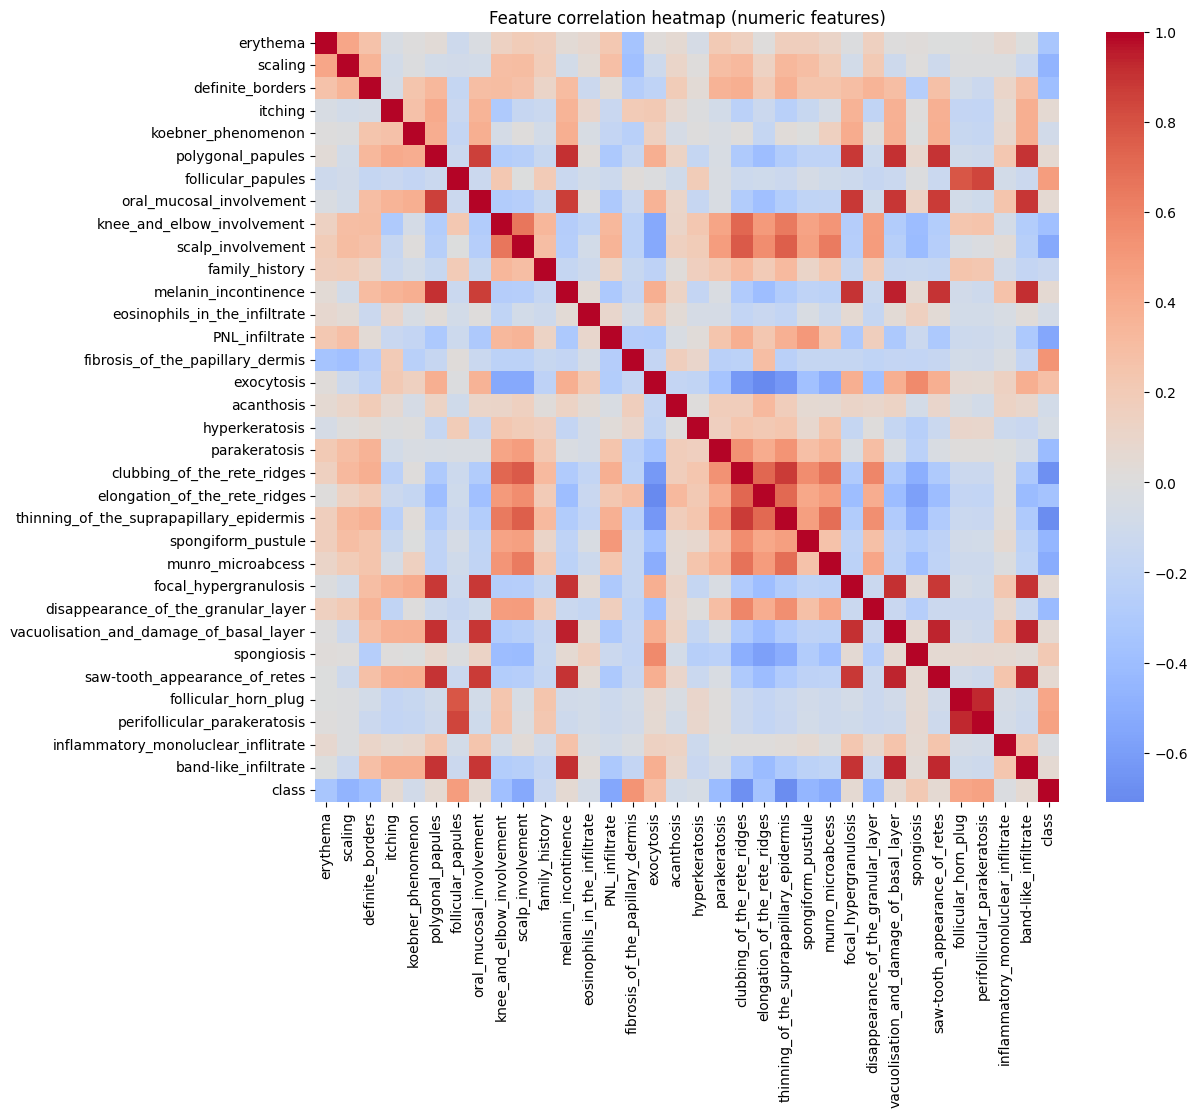

In [3]:
# Basic EDA
display(df.info())
display(df.describe(include='all').T)

# Check missing values
missing = df.isna().sum().sort_values(ascending=False)
print('Missing values (top 20):')
print(missing.head(20))

# Target distribution (the target column is typically the last column '34' or named 'class')
# Inspect column names to pick the target
print('Columns:', df.columns.tolist())

# Common variants: last column named 'class' or '34' or 'diagnosis'. We'll try to detect.
possible_targets = [c for c in df.columns if c.lower() in ('class','diag','diagnosis','disease','target','label')]
if not possible_targets:
    target_col = df.columns[-1]
else:
    target_col = possible_targets[0]
print('Using target column:', target_col)
print(df[target_col].value_counts())

# Quick pairwise correlation heatmap for numeric features (sample if too many)
num_df = df.select_dtypes(include=[np.number])

# Automatically adjust sample size to dataset size
sample_size = min(len(num_df), 500)

if num_df.shape[1] > 20:
    sample_corr = num_df.sample(n=sample_size, random_state=42).corr()
else:
    sample_corr = num_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(sample_corr, cmap='coolwarm', center=0)
plt.title('Feature correlation heatmap (numeric features)')
plt.show()


## Preprocessing & Feature Engineering

Steps included in the pipeline:
- Identify numerical features and impute missing values
- Standard scaling for numeric features
- If necessary, encode categorical features (target remains numeric labels)
- Train-test split with stratification


In [4]:
# Preprocessing: prepare X and y
# Assume target_col found earlier
target_col = target_col  # from previous cell; when running the notebook the variable persists
X = df.drop(columns=[target_col])
y = df[target_col].astype(int)  # ensure integer labels

# Identify numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns count:', len(numeric_cols))

# Simple imputer + scaler pipeline for numeric features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols)
], remainder='drop')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Numeric columns count: 33
Train shape: (292, 34) Test shape: (74, 34)


## Models to compare

We include the following models and evaluate them using cross-validation and a held-out test set:
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine (RBF)
- Decision Tree
- Random Forest
- (Optional) XGBoost if available
Each model is evaluated by Accuracy and Macro F1 score due to class imbalance concerns.


In [7]:
## Model Training — All Models

from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

scoring = {
    'accuracy': 'accuracy',
    'macro_f1': make_scorer(f1_score, average='macro')
}

results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("🔹 Starting model training and cross-validation...\n")

for name, model in models.items():
    print(f"Training {name} ...")
    pipe = Pipeline([
        ('preproc', preprocessor),
        ('clf', model)
    ])
    try:
        cv_res = cross_validate(
            pipe,
            X_train, y_train,
            cv=cv,
            scoring=scoring,
            return_train_score=False,
            error_score='raise'
        )
        mean_acc = np.mean(cv_res['test_accuracy'])
        mean_f1 = np.mean(cv_res['test_macro_f1'])
        results.append({
            'Model': name,
            'CV_Accuracy': mean_acc,
            'CV_Macro_F1': mean_f1
        })
        print(f'✅ {name} done — Accuracy={mean_acc:.4f}, Macro F1={mean_f1:.4f}\n')
    except Exception as e:
        print(f'❌ {name} failed during CV:\n', e)
        results.append({
            'Model': name,
            'CV_Accuracy': np.nan,
            'CV_Macro_F1': np.nan
        })

results_df = pd.DataFrame(results)
print("\n✅ Model training complete.")
results_df


🔹 Starting model training and cross-validation...

Training LogisticRegression ...
✅ LogisticRegression done — Accuracy=0.9794, Macro F1=0.9766

Training KNN ...
✅ KNN done — Accuracy=0.9658, Macro F1=0.9587

Training SVC ...
✅ SVC done — Accuracy=0.9760, Macro F1=0.9730

Training DecisionTree ...
✅ DecisionTree done — Accuracy=0.9555, Macro F1=0.9429

Training RandomForest ...
✅ RandomForest done — Accuracy=0.9726, Macro F1=0.9664


✅ Model training complete.


,Model,CV_Accuracy,CV_Macro_F1
0,LogisticRegression,0.979427,0.976555
1,KNN,0.965751,0.958749
2,SVC,0.975979,0.972957
3,DecisionTree,0.955523,0.942917
4,RandomForest,0.972589,0.966419


🏆 Model Comparison Report:


,Model,CV_Accuracy,CV_Macro_F1
0,LogisticRegression,0.979427,0.976555
1,SVC,0.975979,0.972957
2,RandomForest,0.972589,0.966419
3,KNN,0.965751,0.958749
4,DecisionTree,0.955523,0.942917


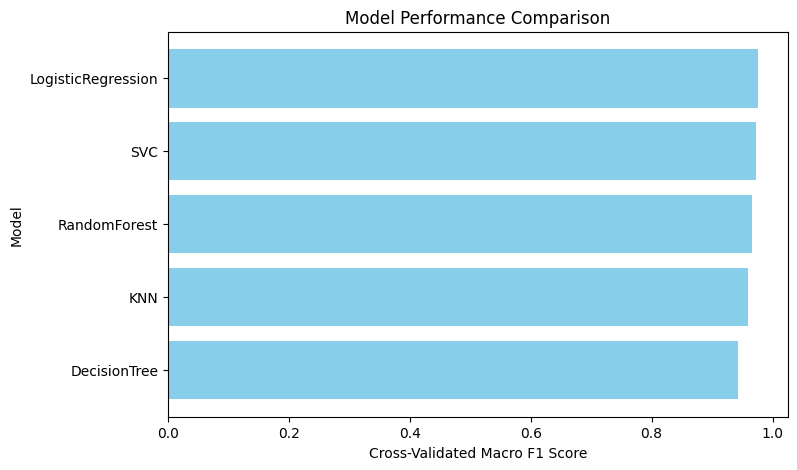


✅ Best performing model: **LogisticRegression**


In [8]:
## Model Comparison Report

import matplotlib.pyplot as plt

# Sort models by Macro F1
results_df = results_df.sort_values(by='CV_Macro_F1', ascending=False).reset_index(drop=True)

print("🏆 Model Comparison Report:")
display(results_df)

# Visual comparison
plt.figure(figsize=(8, 5))
plt.barh(results_df['Model'], results_df['CV_Macro_F1'], color='skyblue')
plt.xlabel('Cross-Validated Macro F1 Score')
plt.ylabel('Model')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()
plt.show()

# Identify best model
best_model_name = results_df.loc[0, 'Model']
print(f"\n✅ Best performing model: **{best_model_name}**")


## Final evaluation on the test set (best model)

We will pick the best model by CV Macro F1 and evaluate on the test set with classification report and confusion matrix.


Best model by CV macro F1: LogisticRegression
Test Accuracy: 0.9594594594594594
Test Macro F1: 0.9573622279769207

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      0.83      0.91        12
           3       1.00      0.93      0.97        15
           4       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.97      0.96      0.96        74



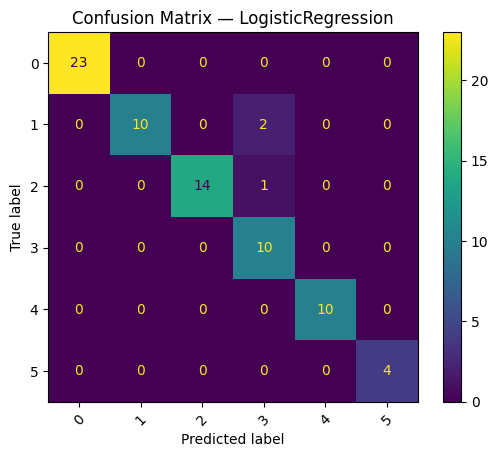

In [10]:
# Train best model on full training set and evaluate on test set
best_model_name = results_df.loc[0, 'Model']
print('Best model by CV macro F1:', best_model_name)
best_model = models[best_model_name]
best_pipe = Pipeline([('preproc', preprocessor), ('clf', best_model)])
best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)

print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Test Macro F1:', f1_score(y_test, y_pred, average='macro'))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion matrix display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title(f'Confusion Matrix — {best_model_name}')
plt.show()


## Suggestions for Doctors (Early Identification)

Based on EDA and model explainability (feature importances where applicable), provide practical suggestions to help clinicians identify diseases earlier. Examples:
- Pay attention to high-importance clinical signs (e.g., erythema, scaling, definite borders).
- Consider family history and patient age as supporting clues.
- Where histopathological features strongly differentiate conditions (e.g., munro microabscess), prioritize those tests earlier in ambiguous cases.
- Use a simple checklist combining the top 5 predictive features as a quick triage tool for primary care.


## Challenges faced & Mitigation

- **Class imbalance**: Use stratified splits and macro-averaged metrics. Consider resampling or class-weighted models for future improvements.
- **Missing values / inconsistent formatting**: Imputed using median; checked for erroneous values.
- **Feature interpretability**: Tree-based models provide feature importances; for black-box models, consider SHAP/LIME for explainability.
- **Limited data size**: Use cross-validation and cautious regularization to avoid overfitting.


## Conclusion & Recommendation

- The notebook compares multiple models and recommends the model with the best macro-F1 score for production.
- For deployment, consider: more data collection, clinician-in-the-loop validation, and model explainability (SHAP) before clinical use.
- This notebook and the generated model artifacts can be extended with hyperparameter tuning and additional feature engineering.
